In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sympy import *

In [ ]:
df = pd.DataFrame({'x': np.random.randint(10, size=15), 'y': np.random.randint(2, size=15)})
df

,x,y
0,2,1
1,2,0
2,3,1
3,2,1
4,0,0
5,5,1
6,6,1
7,7,0
8,8,0
9,1,1


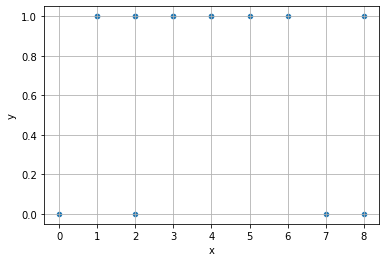

In [ ]:
df.plot(x='x', y='y', kind='scatter', grid=True)

In [ ]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.scatter(df['x'], df['y'])
    plt.plot(x, m * x + b)
    plt.xlim(-1, 11)
    plt.ylim(-1, 2)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [ ]:
m, b = 1, 1
n =100
nu = 0.01
df['pred'] = m * df['x'] + b
for i in range(n):
  df['err'] = df['y'] - df['pred']

  df['m_change'] = df['x'] * np.sign(df['err'])
  df['b_change'] = np.sign(df['err'])

  m += nu * df['m_change'].mean()
  b += nu * df['b_change'].mean()

  df['pred'] = m * df['x'] + b

  df['err'] = df['y'] - df['pred']
  df['err_abs'] = np.abs(df['err'])

  if i % 5 == 0:
    print(df['err_abs'].mean())

3.8506222222222215
3.103733333333333
2.356844444444444
1.6099555555555556
0.8630666666666669
0.3369777777777779
0.32920000000000005
0.32560000000000017
0.32297777777777786
0.3197333333333334
0.3156000000000001
0.31146666666666684
0.30884444444444464
0.3061333333333335
0.3020000000000002
0.30186666666666706
0.29631111111111125
0.2919111111111113
0.2894666666666668
0.30284444444444464


In [ ]:
(m, b)

(0.0026666666666667095, 0.9373333333333328)

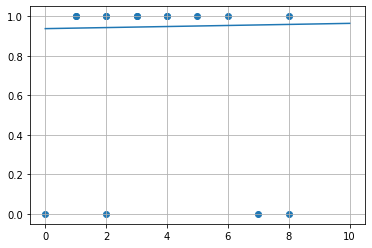

In [ ]:
x = np.linspace(0, 10, num=1000)
plt.grid()
plt.plot(x, m * x + b)
plt.scatter(df['x'], df['y'])

In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs
0,2,1,0.942667,0.057333,2.0,1.0,0.057333
1,2,0,0.942667,-0.942667,-2.0,-1.0,0.942667
2,3,1,0.945333,0.054667,3.0,1.0,0.054667
3,2,1,0.942667,0.057333,2.0,1.0,0.057333
4,0,0,0.937333,-0.937333,-0.0,-1.0,0.937333
5,5,1,0.950667,0.049333,-5.0,-1.0,0.049333
6,6,1,0.953333,0.046667,-6.0,-1.0,0.046667
7,7,0,0.956000,-0.956000,-7.0,-1.0,0.956000
8,8,0,0.958667,-0.958667,-8.0,-1.0,0.958667
9,1,1,0.940000,0.060000,1.0,1.0,0.060000


In [ ]:
roc_auc_score(df['y'], df['pred'])

0.46590909090909094

**sklearn**

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(df[['x']], df['y'])

LogisticRegression()

In [ ]:
lr.predict_proba(df[['x']])[:,1]

array([0.77068263, 0.77068263, 0.75133215, 0.77068263, 0.80612882,
       0.70947792, 0.68705994, 0.66373198, 0.63957729, 0.7889503 ,
       0.7889503 , 0.75133215, 0.73091892, 0.73091892, 0.63957729])

In [ ]:
df['lr_pred'] = lr.predict_proba(df[['x']])[:,1]

In [ ]:
roc_auc_score(df['y'], df['lr_pred'])

0.5340909090909091

ищем производную

In [ ]:
x_ = Symbol('x', real=True)
y_ = Symbol('y', real=True)
m_ = Symbol('m', real=True)
b_ = Symbol('b', real=True)

In [ ]:
#error
e = Abs(y_ - 1/ (1+exp(-m_ * x_ - b_)))
e

Abs(y - 1/(exp(-b - m*x) + 1))

In [ ]:
#derivative m
dif_m = diff(e, m_)
dif_m 

-x*exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2

In [ ]:
print("After Differentiation : {}".format(dif_m))

After Differentiation : -x*exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2


In [ ]:
#derivative b
dif_b = diff(e, b_)
dif_b

-exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2

In [ ]:
print("After Differentiation : {}".format(dif_b))

After Differentiation : -exp(-b - m*x)*sign(y - 1/(exp(-b - m*x) + 1))/(exp(-b - m*x) + 1)**2


In [ ]:
df = df[['x', 'y']].copy()
m, b = 1, 1
n =1000
nu = 0.05
df['pred'] = 1 / (1 + np.exp(-(m * df['x'] + b)))
for i in range(n):
  df['err'] = df['y'] - df['pred']

  df['m_change'] = df['x']*np.exp(-b - m*df['x'])*np.sign(df['y'] - 1/(np.exp(-b - m*df['x']) + 1))/(np.exp(-b - m*df['x']) + 1)**2
  df['b_change'] = np.exp(-b - m*df['x'])*np.sign(df['y'] - 1/(np.exp(-b - m*df['x']) + 1))/(np.exp(-b - m*df['x']) + 1)**2

  m += nu * df['m_change'].mean()
  b += nu * df['b_change'].mean()

  df['pred'] = 1 / (1 + np.exp(-(m * df['x'] + b)))

  df['err'] = df['y'] - df['pred']
  df['err_abs'] = np.abs(df['err'])

  if i % 100 == 0:
    print(df['err_abs'].mean())

0.2712337152656917
0.267319614179356
0.2649301062527455
0.263257641264134
0.26197964000271734
0.26094026834774825
0.26005438577788315
0.25927124064875495
0.2585585331244316
0.2578946237962069


In [ ]:
df

,x,y,pred,err,m_change,b_change,err_abs
0,2,1,0.989060,1.093996e-02,0.021657,1.082845e-02,1.093996e-02
1,2,0,0.989060,-9.890600e-01,-0.021657,-1.082845e-02,9.890600e-01
2,3,1,0.998134,1.865809e-03,0.005594,1.864695e-03,1.865809e-03
3,2,1,0.989060,1.093996e-02,0.021657,1.082845e-02,1.093996e-02
4,0,0,0.720836,-7.208361e-01,-0.000000,-2.012105e-01,7.208361e-01
5,5,1,0.999947,5.338578e-05,0.000268,5.350486e-05,5.338578e-05
6,6,1,0.999991,9.022566e-06,0.000054,9.047648e-06,9.022566e-06
7,7,0,0.999998,-9.999985e-01,-0.000011,-1.529840e-06,9.999985e-01
8,8,0,1.000000,-9.999997e-01,-0.000002,-2.586730e-07,9.999997e-01
9,1,1,0.938571,6.142921e-02,0.057669,5.766922e-02,6.142921e-02


(-1.0, 2.0)

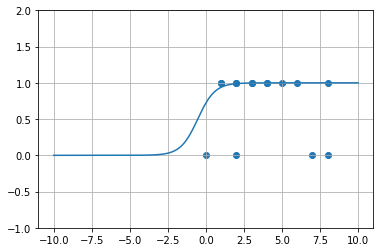

In [ ]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.scatter(df['x'], df['y'])
plt.plot(x, 1/(1+np.exp(-(m * x + b))))
plt.xlim(-11, 11)
plt.ylim(-1, 2)